#MAJOR PROJECT PART-2 (3)
DATA ANALYTICS TOWARDS MONITORING THE IMPACT OF MOBILE PHONE ON USER HEALTH AND USER MOBILE RECOMMENDATION USING SENTIMENT ANALYSIS

##Enrollment Number: 19103048
##Name of Student: RITIK RUSTAGI
##Name of Supervisor: Dr. Ankit Vidyarthi

#JAYPEE INSTITUTE OF INFORMATION TECHNOLOGY, NOIDA

In [ ]:
!python --version

Python 2.7.18


In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#nltk.download()

In [ ]:
import os
os.chdir("/Users/ritikrustagi/Documents/Major_Project_Part-2/data")
os.getcwd()

'/Users/ritikrustagi/Documents/Major_Project_Part-2/data'

In [ ]:
def load_data():
    data= pd.read_csv('Samsung.csv')
    return data

In [ ]:
tweet_df= load_data()

In [ ]:
tweet_df.head()

,timestamp,Tweet,username,all_hashtags,followers_count
0,Relationship Date (UTC),Tweet,Domains in Tweet,Hashtags in Tweet,NaN
1,10/22/21 7:12,The 10 Biggest Companies by Market Cap in 2001...,twitter.com,NaN,NaN
2,10/22/21 7:12,"RT @Khairykj: In less than two months, we have...",NaN,NaN,NaN
3,10/22/21 7:12,RT @peach_013: I just feel like I can't wait a...,NaN,NaN,NaN
4,10/22/21 7:12,RT @peach_013: I just feel like I can't wait a...,NaN,NaN,NaN


In [ ]:
#remove extra columns
df= pd.DataFrame(tweet_df.iloc[:,1])
df.head()

,Tweet
0,Tweet
1,The 10 Biggest Companies by Market Cap in 2001...
2,"RT @Khairykj: In less than two months, we have..."
3,RT @peach_013: I just feel like I can't wait a...
4,RT @peach_013: I just feel like I can't wait a...


In [ ]:
#remove username
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
df['Tweet'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*")
df.head()

,Tweet
0,Tweet
1,The 10 Biggest Companies by Market Cap in 2001...
2,"RT : In less than two months, we have been abl..."
3,RT : I just feel like I can't wait any longer....
4,RT : I just feel like I can't wait any longer....


In [ ]:
 #import stopword
from nltk.corpus import stopwords
stopwords_english = stopwords.words('english')

#Stemming and Lemmatization
#from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#porter= PorterStemmer()
wordnet= WordNetLemmatizer()

#tokenize
from nltk.tokenize import TweetTokenizer

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

def clean_tweets(tweet):

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    #remove coma
    tweet = re.sub(r',','',tweet)

    #remove number
    tweet = re.sub('[0-9]+', '', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(porter.stem(word))
            """port_word = porter.stem(word) # stemming word
            tweets_clean.append(port_word)"""
            net_word = wordnet.lemmatize(word) #lemmatizing word
            tweets_clean.append(net_word)

    return tweets_clean

In [ ]:
df['tweet_clean'] = df['Tweet'].apply(lambda x: clean_tweets(x))
df.head()

,Tweet,tweet_clean
0,Tweet,[tweet]
1,The 10 Biggest Companies by Market Cap in 2001...,"[biggest, company, market, cap, general, elect..."
2,"RT : In less than two months, we have been abl...","[le, two, month, able, give, year, old, least,..."
3,RT : I just feel like I can't wait any longer....,"[feel, like, can't, wait, longer, well, lost, ..."
4,RT : I just feel like I can't wait any longer....,"[feel, like, can't, wait, longer, well, lost, ..."


In [ ]:
#remove punct
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text

In [ ]:
df['pre_processed_tweet'] = df['tweet_clean'].apply(lambda x: remove_punct(x))
df.head()

,Tweet,tweet_clean,pre_processed_tweet
0,Tweet,[tweet],tweet
1,The 10 Biggest Companies by Market Cap in 2001...,"[biggest, company, market, cap, general, elect...",biggest company market cap general electric ci...
2,"RT : In less than two months, we have been abl...","[le, two, month, able, give, year, old, least,...",le two month able give year old least first do...
3,RT : I just feel like I can't wait any longer....,"[feel, like, can't, wait, longer, well, lost, ...",feel like can't wait longer well lost opportun...
4,RT : I just feel like I can't wait any longer....,"[feel, like, can't, wait, longer, well, lost, ...",feel like can't wait longer well lost opportun...


In [ ]:
df.sort_values("pre_processed_tweet", inplace = True)
df.drop(df.columns[[0,1]], axis = 1, inplace = True)
df.drop_duplicates(subset ="pre_processed_tweet", keep = 'first', inplace = True)
df.head()

,pre_processed_tweet
231,
5207,.. r republika południowej afryki prosi koncer...
4669,.. wurde bekannt das südafrika lieferungen von...
2609,absolute waanzin en geen enkele politicus jour...
2095,according israeli immunologist zvika granot pa...


In [ ]:
# df.to_csv('Samsung.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
from textblob import TextBlob

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['pre_processed_tweet'].apply(getSubjectivity)
df['Polarity'] = df['pre_processed_tweet'].apply(getPolarity)

In [ ]:
df.head()

,pre_processed_tweet,Subjectivity,Polarity
231,,0.000,0.000
5207,.. r republika południowej afryki prosi koncer...,0.000,0.000
4669,.. wurde bekannt das südafrika lieferungen von...,0.000,0.000
2609,absolute waanzin en geen enkele politicus jour...,0.900,0.200
2095,according israeli immunologist zvika granot pa...,0.575,0.075


In [ ]:
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

In [ ]:
df.head()

,pre_processed_tweet,Subjectivity,Polarity,Analysis
231,,0.000,0.000,Neutral
5207,.. r republika południowej afryki prosi koncer...,0.000,0.000,Neutral
4669,.. wurde bekannt das südafrika lieferungen von...,0.000,0.000,Neutral
2609,absolute waanzin en geen enkele politicus jour...,0.900,0.200,Positive
2095,according israeli immunologist zvika granot pa...,0.575,0.075,Positive


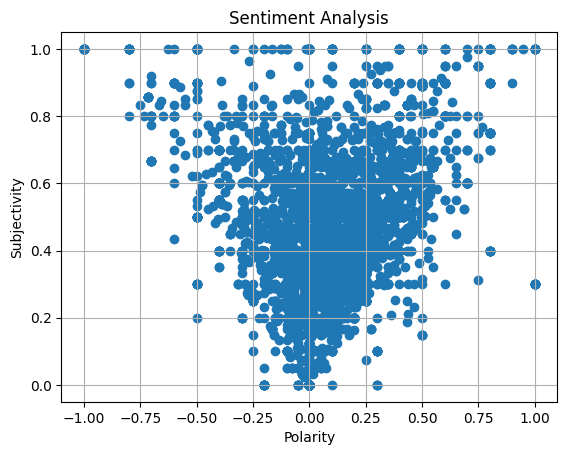

In [ ]:
#Plot the Polarity and Subjectivity
#plt.figure(figsize=(10,10))
plt.scatter(df['Polarity'], df['Subjectivity'])#, color='g', marker='*'
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid()
plt.show()

In [ ]:
#get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['pre_processed_tweet']
round((ptweets.shape[0]/df.shape[0])*100,1)

36.9

In [ ]:
#get the percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['pre_processed_tweet']
round((ptweets.shape[0]/df.shape[0])*100,1)

15.6

<function matplotlib.pyplot.show(close=None, block=None)>

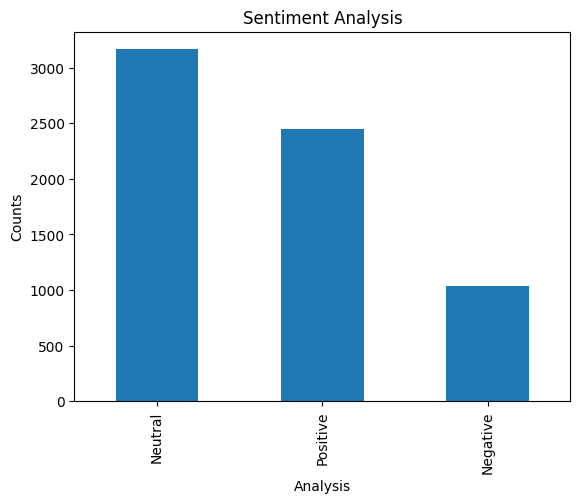

In [ ]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualise counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show